# Ödev 2: K-Means ve California Housing Dataset

Bu ödevde California housing veri setini, Kmeans algoritmasını kullanarak ekonomik segmentlere ayırmanız gerekmektedir. Alt görevler:

1. Verisetini kullanarak farklı cluster sayılarında KMeans clusterları eğit (2-8 arası iyi bir seçim)
2. Her bir KMeans için silhouette skorunu çıkar ve görselleştir. Eğer istersen Silhouette grafiğini de çıkarabilirsin.
3. Farklı cluster sayılarının, segmentasyona etkilerini incele. Örneğin cluster sayısı 2 olduğunda haritayı 2'ye bölüp yukarıdakiler ve aşağıdakiler şeklinde ayırıyor, 3 olduğunda ise yukarıdakiler, aşağıdakiler ve zenginler gibi ayırıyor. Bol bol keşfet!

In [15]:
from sklearn.datasets import fetch_california_housing

dataset  = fetch_california_housing(as_frame = True)

In [16]:
X = dataset.data
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


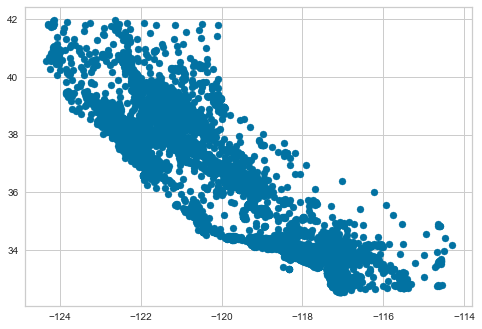

In [17]:
import matplotlib.pyplot as plt

plt.scatter(X['Longitude'],X['Latitude'])

In [18]:
X = X.loc[:, ["MedInc", "Latitude", "Longitude"]]

In [19]:
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


## Kolay gelsin!

In [20]:
from sklearn.metrics import silhouette_score

wcss = []
sil = []

from sklearn.cluster import KMeans

for k in range(2,11):
    kmeans = KMeans(n_clusters= k, init= 'k-means++', max_iter= 300, n_init= 10)
    kmeans = kmeans.fit(X)
    
    pred_clusters = kmeans.predict(X)
    
    wcss.append(kmeans.inertia_)
    sil.append(silhouette_score(X, kmeans.labels_, metric = 'euclidean'))

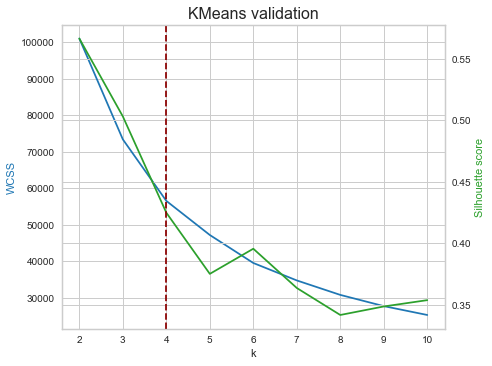

In [21]:
fig, ax1 = plt.subplots(figsize=(7, 5))
t = list(range(2,11))

# Axix 1
color = 'tab:blue'
ax1.set_ylabel('WCSS', color=color)
ax1.set_xlabel("k")
ax1.plot(t, wcss, color=color, label="Elbow method")
#ax1.set_ylim([0, 130])

# Axix 2
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Silhouette score', color=color)
ax2.plot(t, sil, color=color, label="Silhouette analysis")

plt.axvline(x=4, color = "#8b0000", linestyle = "--")
fig.tight_layout()
plt.title("KMeans validation", fontsize=16)
plt.show()

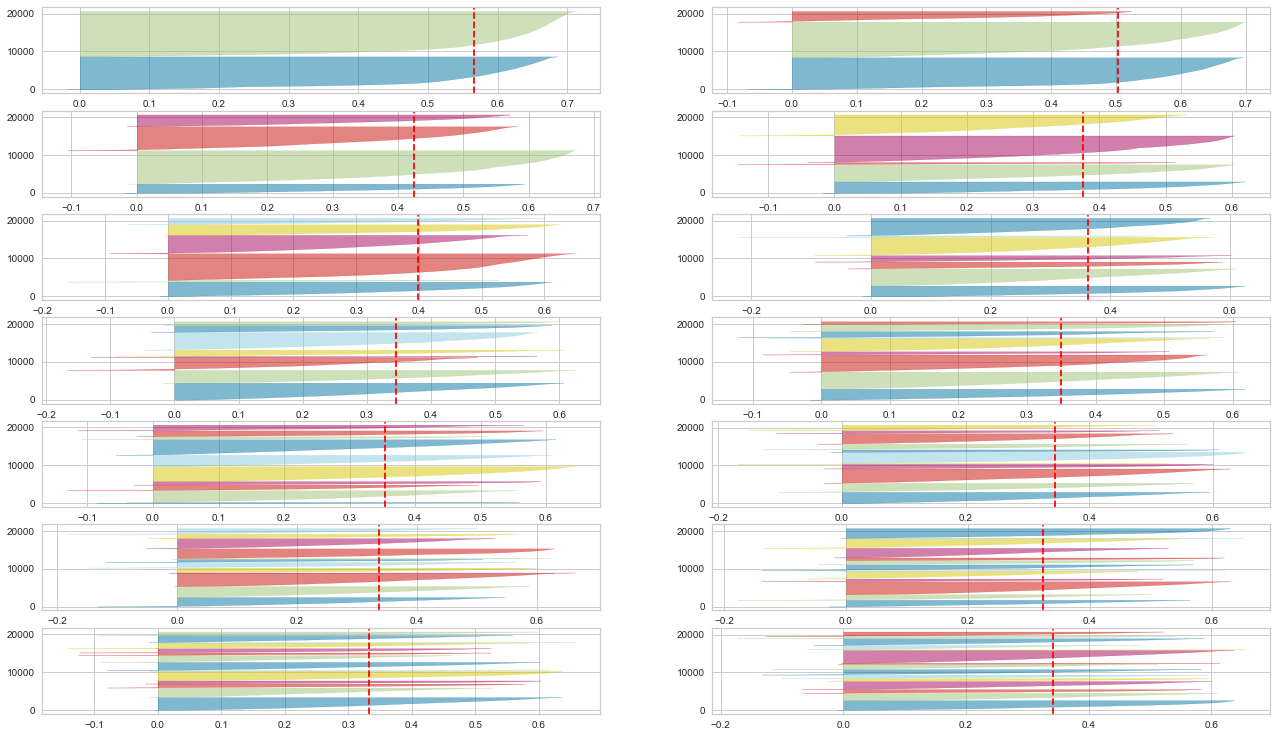

In [22]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(7, 2, figsize=(22,13))
for k in range(2, 16):
    # Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k, 2)
    
    # Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 

### Optimal olarak 4 seçtik.

In [23]:
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, max_iter=100, random_state=42)
kmeans = kmeans.fit(X)
labels = kmeans.labels_

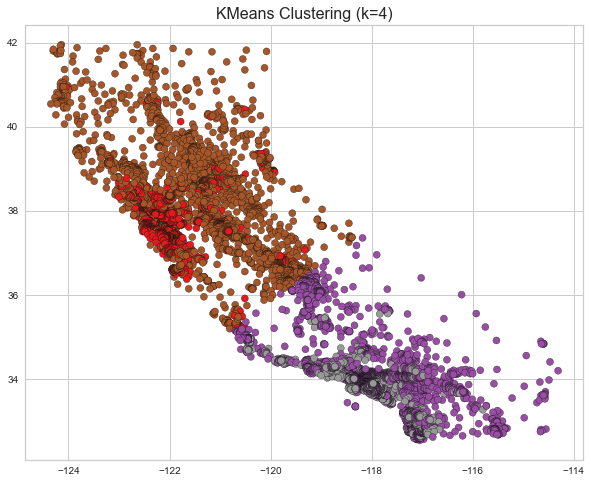

In [24]:
fig, ax = plt.subplots(figsize = (10, 8))
plt.scatter(X["Longitude"], X["Latitude"], c=labels, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel = "Longitude"
plt.ylabel = "Latitude"
plt.title("KMeans Clustering (k=4)", fontsize=16)
plt.show()

In [25]:
# 2 Cluster ile

kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=100, random_state=42)
kmeans = kmeans.fit(X)
labels = kmeans.labels_

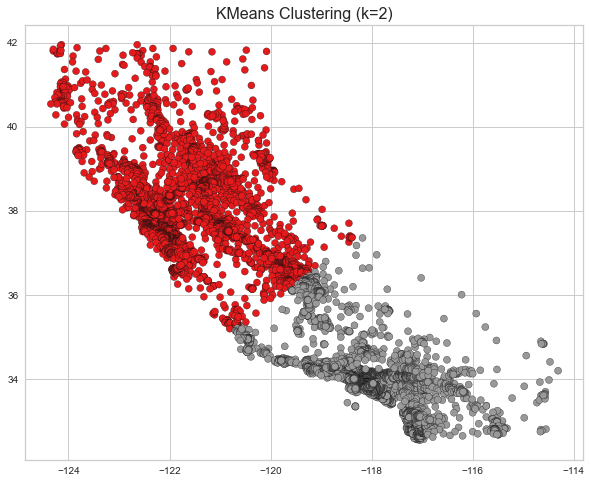

In [26]:
fig, ax = plt.subplots(figsize = (10, 8))
plt.scatter(X["Longitude"], X["Latitude"], c=labels, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel = "Longitude"
plt.ylabel = "Latitude"
plt.title("KMeans Clustering (k=2)", fontsize=16)
plt.show()

In [27]:
# 3 Cluster ile

kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=42)
kmeans = kmeans.fit(X)
labels = kmeans.labels_

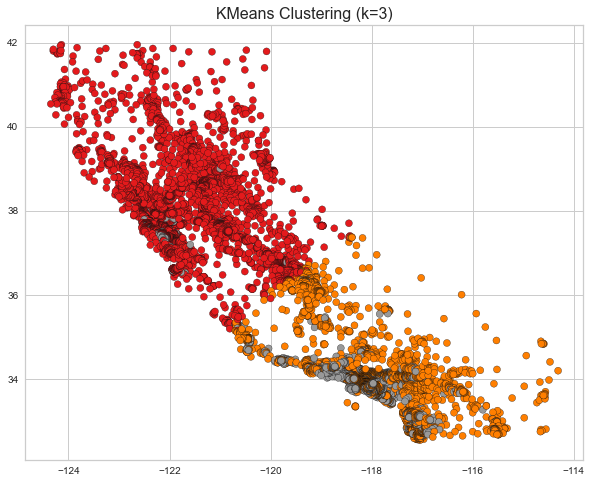

In [28]:
fig, ax = plt.subplots(figsize = (10, 8))
plt.scatter(X["Longitude"], X["Latitude"], c=labels, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel = "Longitude"
plt.ylabel = "Latitude"
plt.title("KMeans Clustering (k=3)", fontsize=16)
plt.show()